### 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$


In [1]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [4]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))

In [5]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])
# Crear las columnas 'año', 'mes' y 'día'
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [6]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 312 to 18236
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2704 non-null   int64         
 1   Date          2704 non-null   datetime64[ns]
 2   AveragePrice  2704 non-null   float64       
 3   Total Volume  2704 non-null   float64       
 4   4046          2704 non-null   float64       
 5   4225          2704 non-null   float64       
 6   4770          2704 non-null   float64       
 7   Total Bags    2704 non-null   float64       
 8   Small Bags    2704 non-null   float64       
 9   Large Bags    2704 non-null   float64       
 10  XLarge Bags   2704 non-null   float64       
 11  type          2704 non-null   object        
 12  year          2704 non-null   int64         
 13  region        2704 non-null   object        
 14  cat_region    2704 non-null   object        
 15  Month         2704 non-null   int32     

#### 1. **Elasticidad Precio-Demanda por Año:**

   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

In [7]:
# Calcular la variación porcentual. Copiamos el greater regions para añadirle columnas con las variaciones y la elasticidad
greater_regions2=greater_regions.copy()
greater_regions2['Total Volume Variacion'] = greater_regions2['Total Volume'].pct_change() * 100  # Multiplicar por 100 para obtener porcentaje
greater_regions2['AveragePrice Variacion'] = greater_regions2['AveragePrice'].pct_change() * 100


#Sacamos las que tengan NaN para evitar problemas y vemos qué info nos da

greater_regions2=greater_regions2.dropna()
greater_regions2[['Total Volume Variacion', 'AveragePrice Variacion']].describe()

,Total Volume Variacion,AveragePrice Variacion
count,2703.000000,2703.000000
mean,2.314560,0.472991
std,25.397763,9.745804
min,-98.449753,-40.170940
25%,-8.208892,-4.444489
50%,0.556642,0.000000
75%,9.507343,4.466780
max,421.489928,68.750000


In [8]:
#Para evitar problemas al dividir por un AveragePrice Variacion demasiada pequeña filtramos los que son mayores q 0.01
filtered=greater_regions2[greater_regions2['AveragePrice Variacion']>0.01]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 313 to 18234
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1255 non-null   int64         
 1   Date                    1255 non-null   datetime64[ns]
 2   AveragePrice            1255 non-null   float64       
 3   Total Volume            1255 non-null   float64       
 4   4046                    1255 non-null   float64       
 5   4225                    1255 non-null   float64       
 6   4770                    1255 non-null   float64       
 7   Total Bags              1255 non-null   float64       
 8   Small Bags              1255 non-null   float64       
 9   Large Bags              1255 non-null   float64       
 10  XLarge Bags             1255 non-null   float64       
 11  type                    1255 non-null   object        
 12  year                    1255 non-null   int64     

Hemos sacado 1448 registros con este filtrado, cosa que puede indicar una estabilidad en el precio en algunos periodos.

In [9]:
# Calcular la elasticidad precio de la demanda para los filtrados
filtered2=filtered.copy()
filtered2['Elasticidad'] = (
    filtered2['Total Volume Variacion'] / 
    filtered2['AveragePrice Variacion']
)

filtered2['Elasticidad'].head()

313   -1.538407
316   -1.246456
317    4.545665
319   -0.582838
321   -1.186542
Name: Elasticidad, dtype: float64

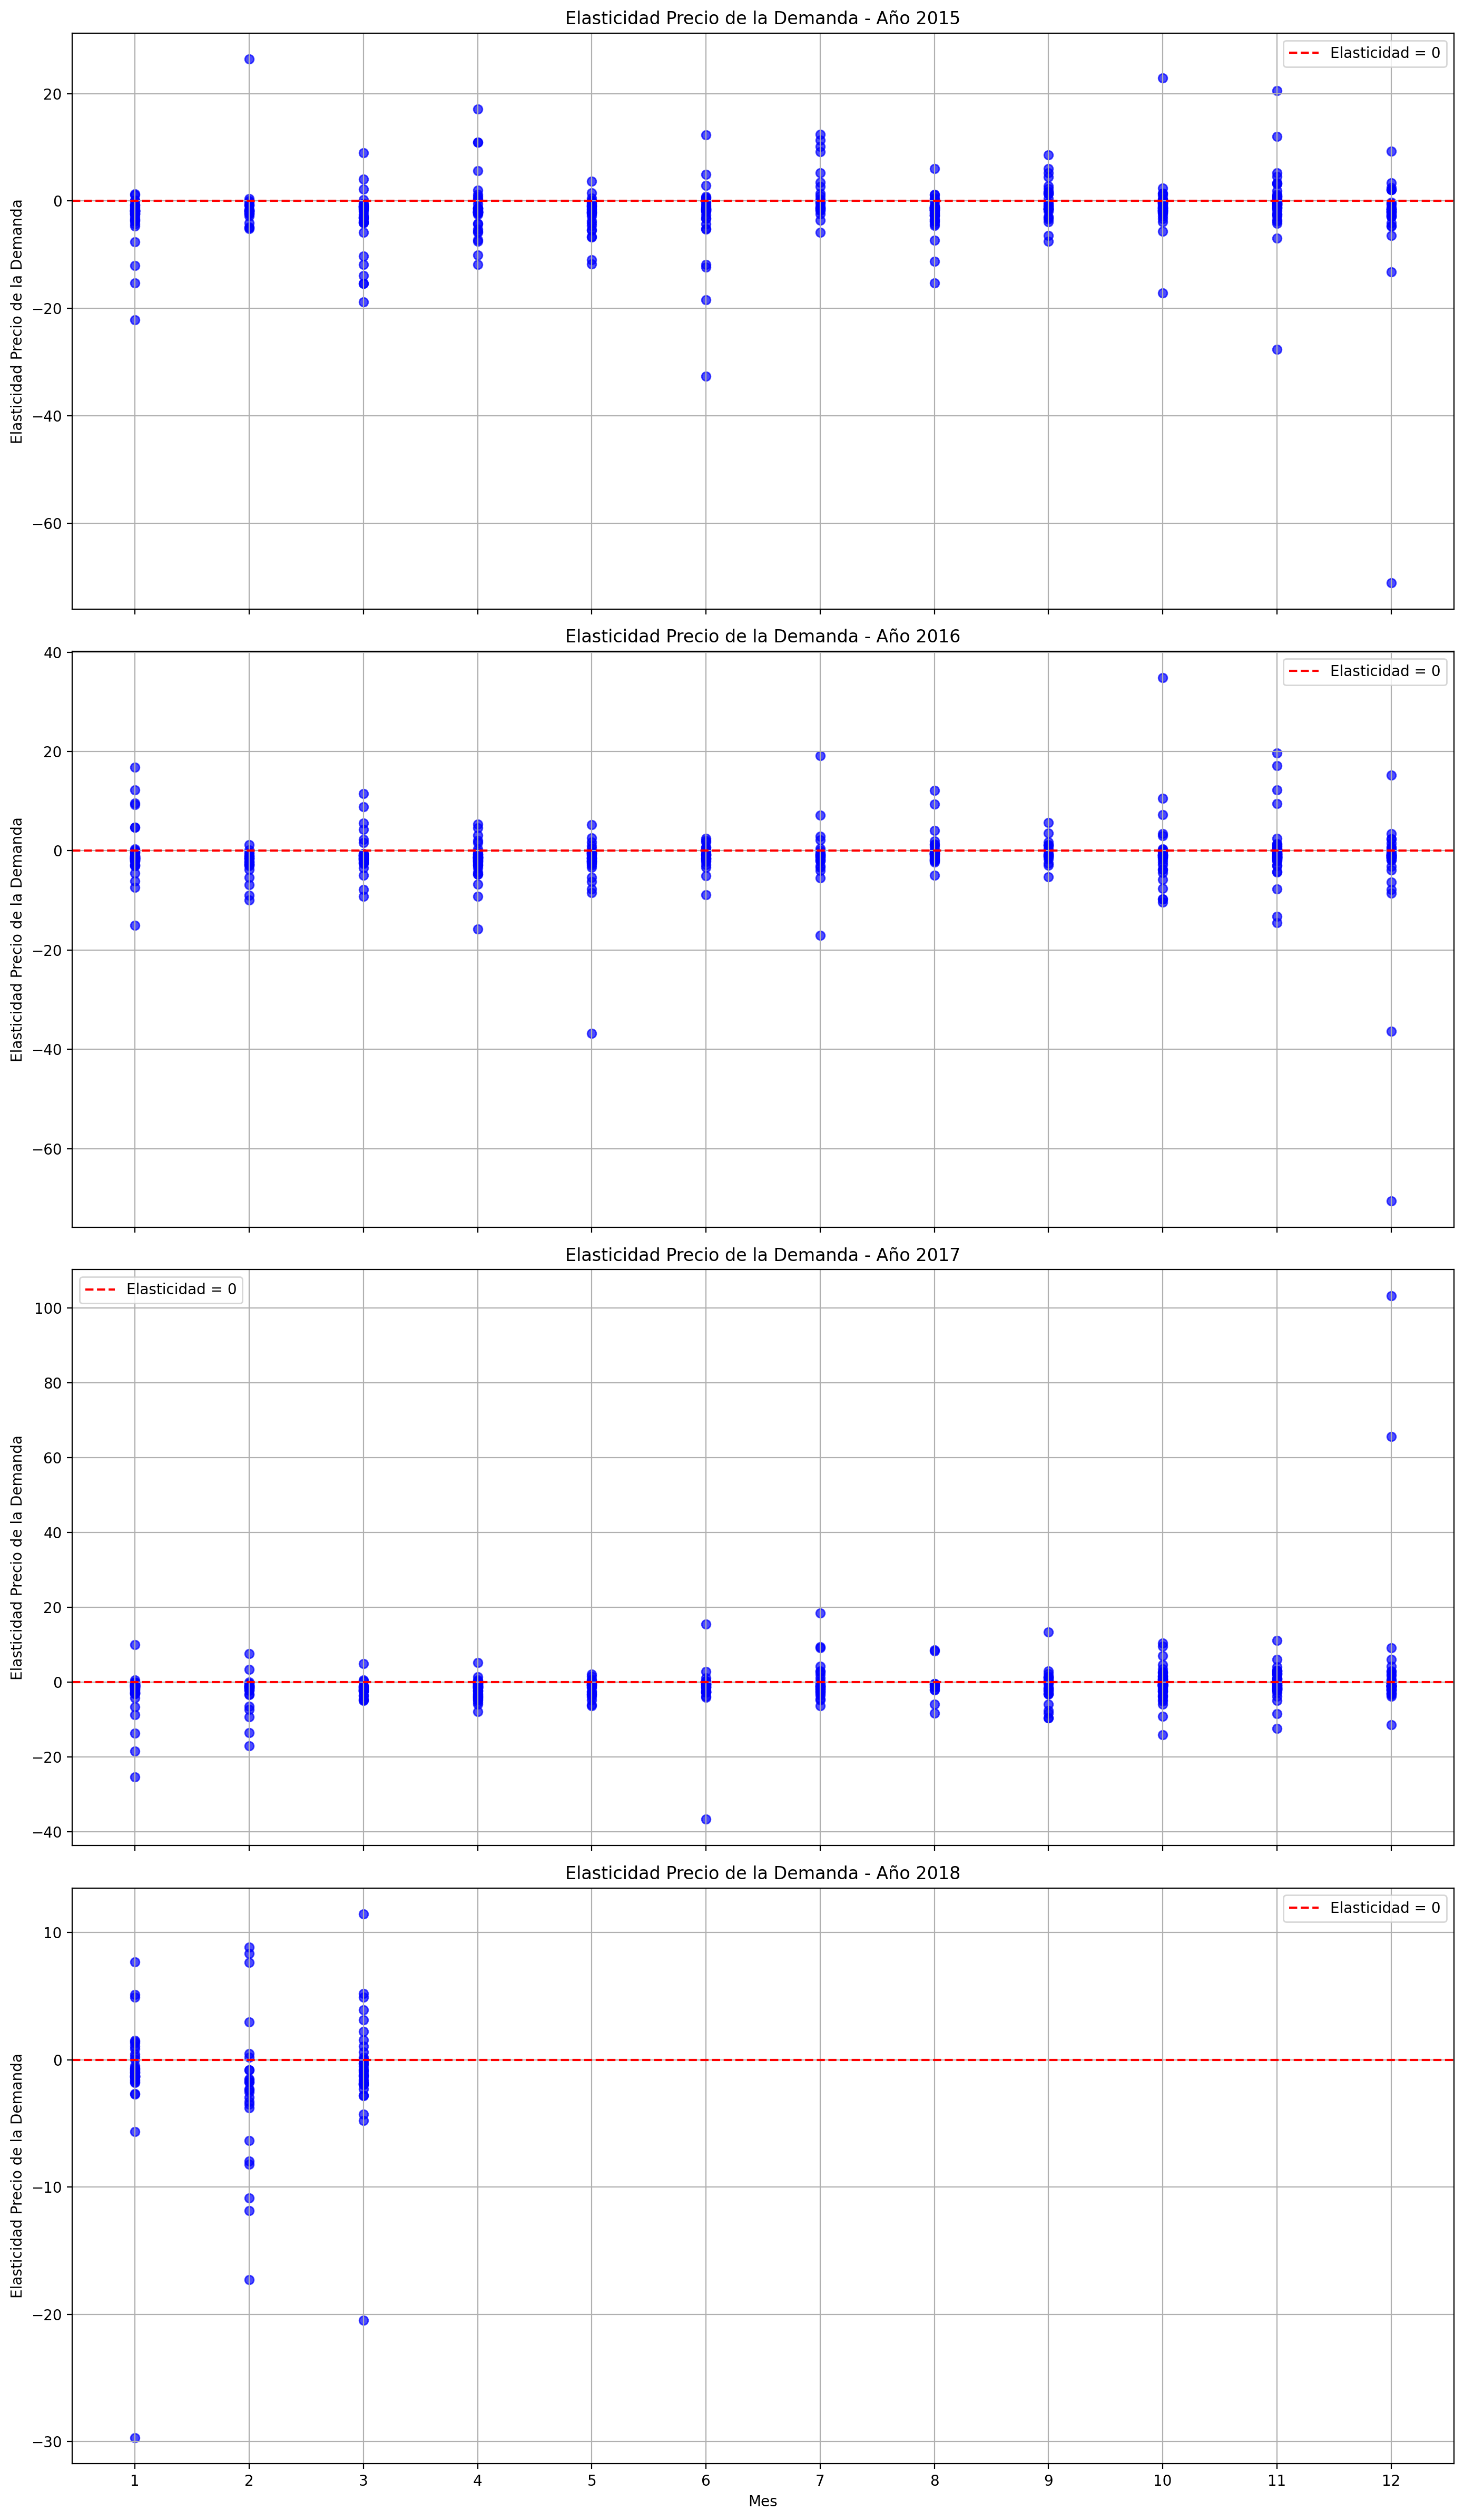

In [10]:
# Crear subgráficos, uno para cada año
years = filtered2['year'].unique()  # Obtener años únicos
num_years = len(years)

fig, axes = plt.subplots(num_years, 1, figsize=(14, 6 * num_years), sharex=True)

# Crear un gráfico por cada año
for i, year in enumerate(years):
    group = filtered2[filtered2['year'] == year]
    axes[i].scatter(group['Month'], group['Elasticidad'], color='blue', alpha=0.7)
    axes[i].axhline(0, color='red', linestyle='--', label='Elasticidad = 0')
    axes[i].set_title(f'Elasticidad Precio de la Demanda - Año {year}')
    axes[i].set_ylabel('Elasticidad Precio de la Demanda')
    axes[i].legend()
    axes[i].grid(True)

# Configuración final del gráfico
plt.xlabel('Mes')
plt.xticks(range(1, 13))  # Asegura que se marquen todos los meses
plt.tight_layout()  # Ajusta el layout para que no se superpongan los gráficos
plt.show()

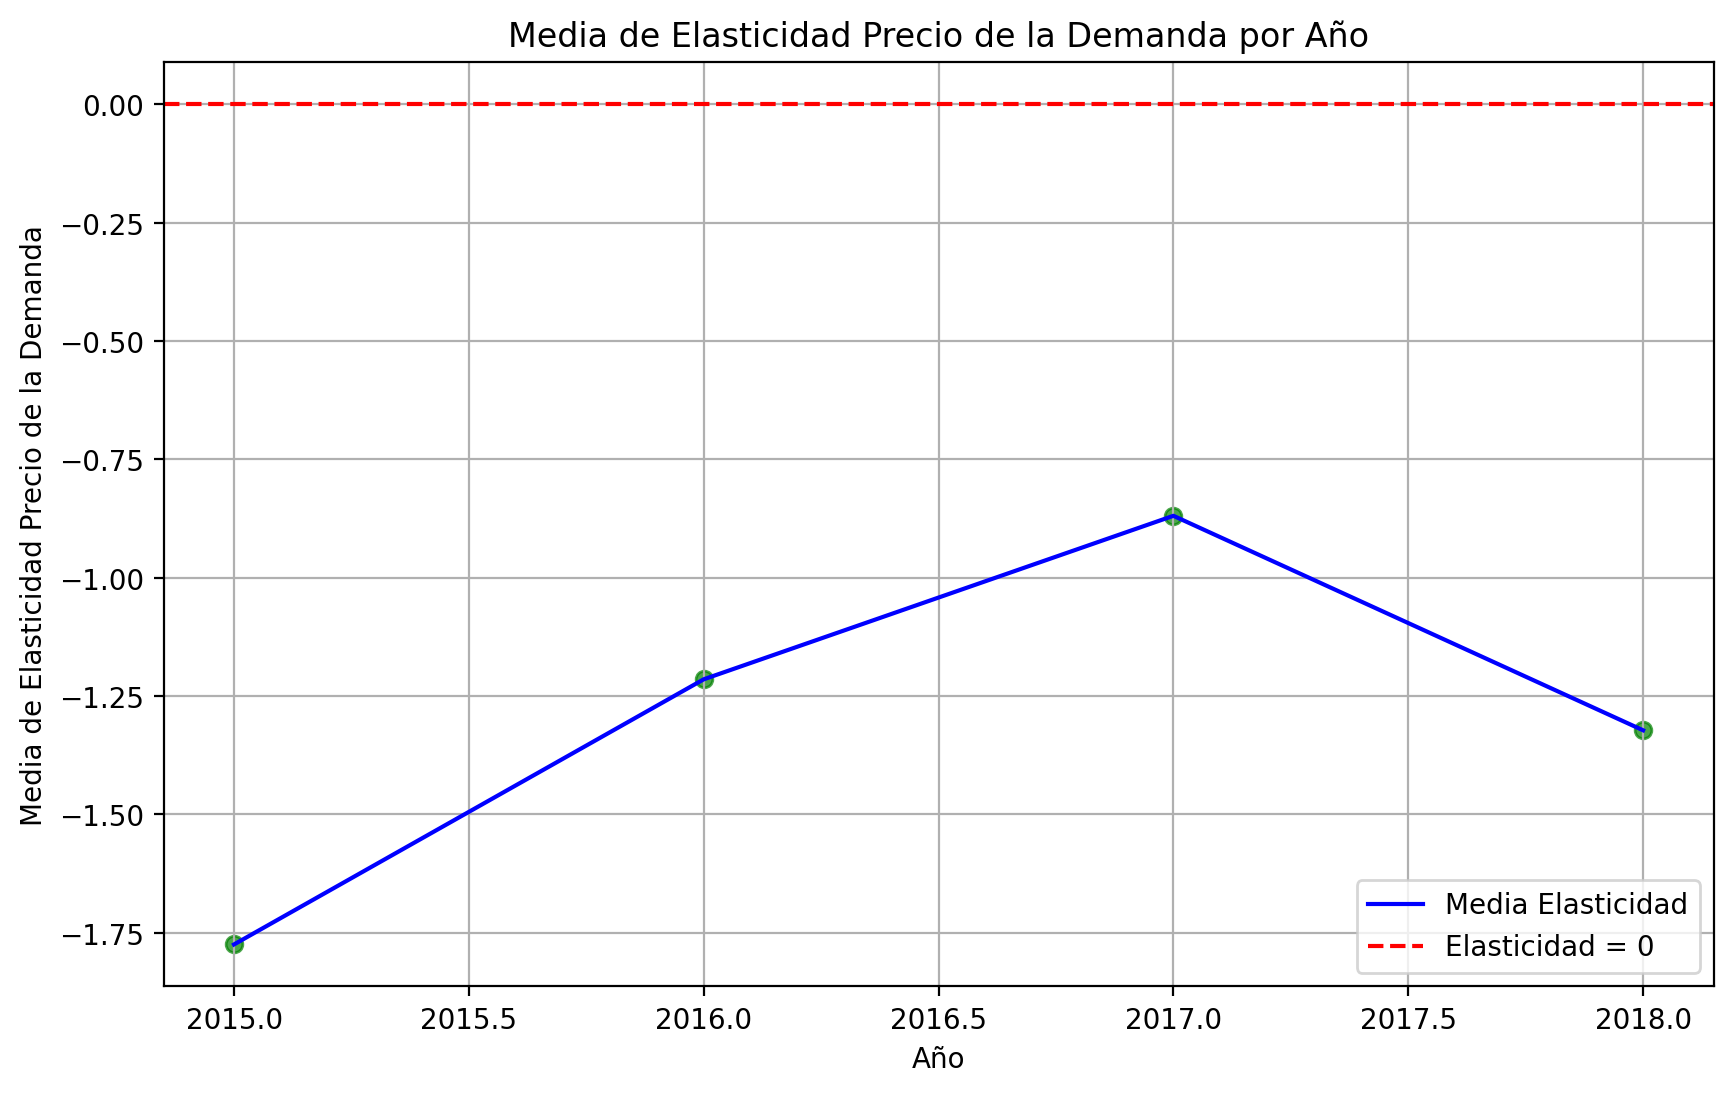

In [11]:
#Calculamos la media por cada año para simplificar la visualización
elasticidad_media_por_año = filtered2.groupby('year')['Elasticidad'].mean().reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(elasticidad_media_por_año['year'], elasticidad_media_por_año['Elasticidad'], color='green', alpha=0.7)
plt.plot(elasticidad_media_por_año['year'], elasticidad_media_por_año['Elasticidad'], color='blue', linestyle='-', label='Media Elasticidad')
plt.title('Media de Elasticidad Precio de la Demanda por Año')
plt.xlabel('Año')
plt.ylabel('Media de Elasticidad Precio de la Demanda')
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')
plt.legend()
plt.grid(True)
plt.show()

Tenemos una elasticidad negativa entre -1,75 y -0.8 aproximadamente. Una elasticidad del precio negativa nos señala que existe una relación inversa entre el precio y la cantidad demandada.
Dado que la mayoría de años la elasticidad es menor que -1 (excepto en 2017 que subió un poco por encima de -1) se puede considerar que la demanda es elástica, que significa que los consumidores son sensibles a los cambios de precio y por lo tanto, un aumento significativo del precio podría provocar una disminución significativa de la demanda.
Esta conclusión tiene sentido ya que el aguacate no es en USA un alimento de primera necesidad como lo sería la leche o el pan.

In [12]:
#Veamos si al separar por tipo esto tiene comportamientes distintos
filtered2_conv=filtered2[filtered2['type']=='conventional']
filtered2_org=filtered2[filtered2['type']=='organic']

elasticidad_media_por_año_conv = filtered2_conv.groupby('year')['Elasticidad'].mean().reset_index()
elasticidad_media_por_año_org = filtered2_org.groupby('year')['Elasticidad'].mean().reset_index()



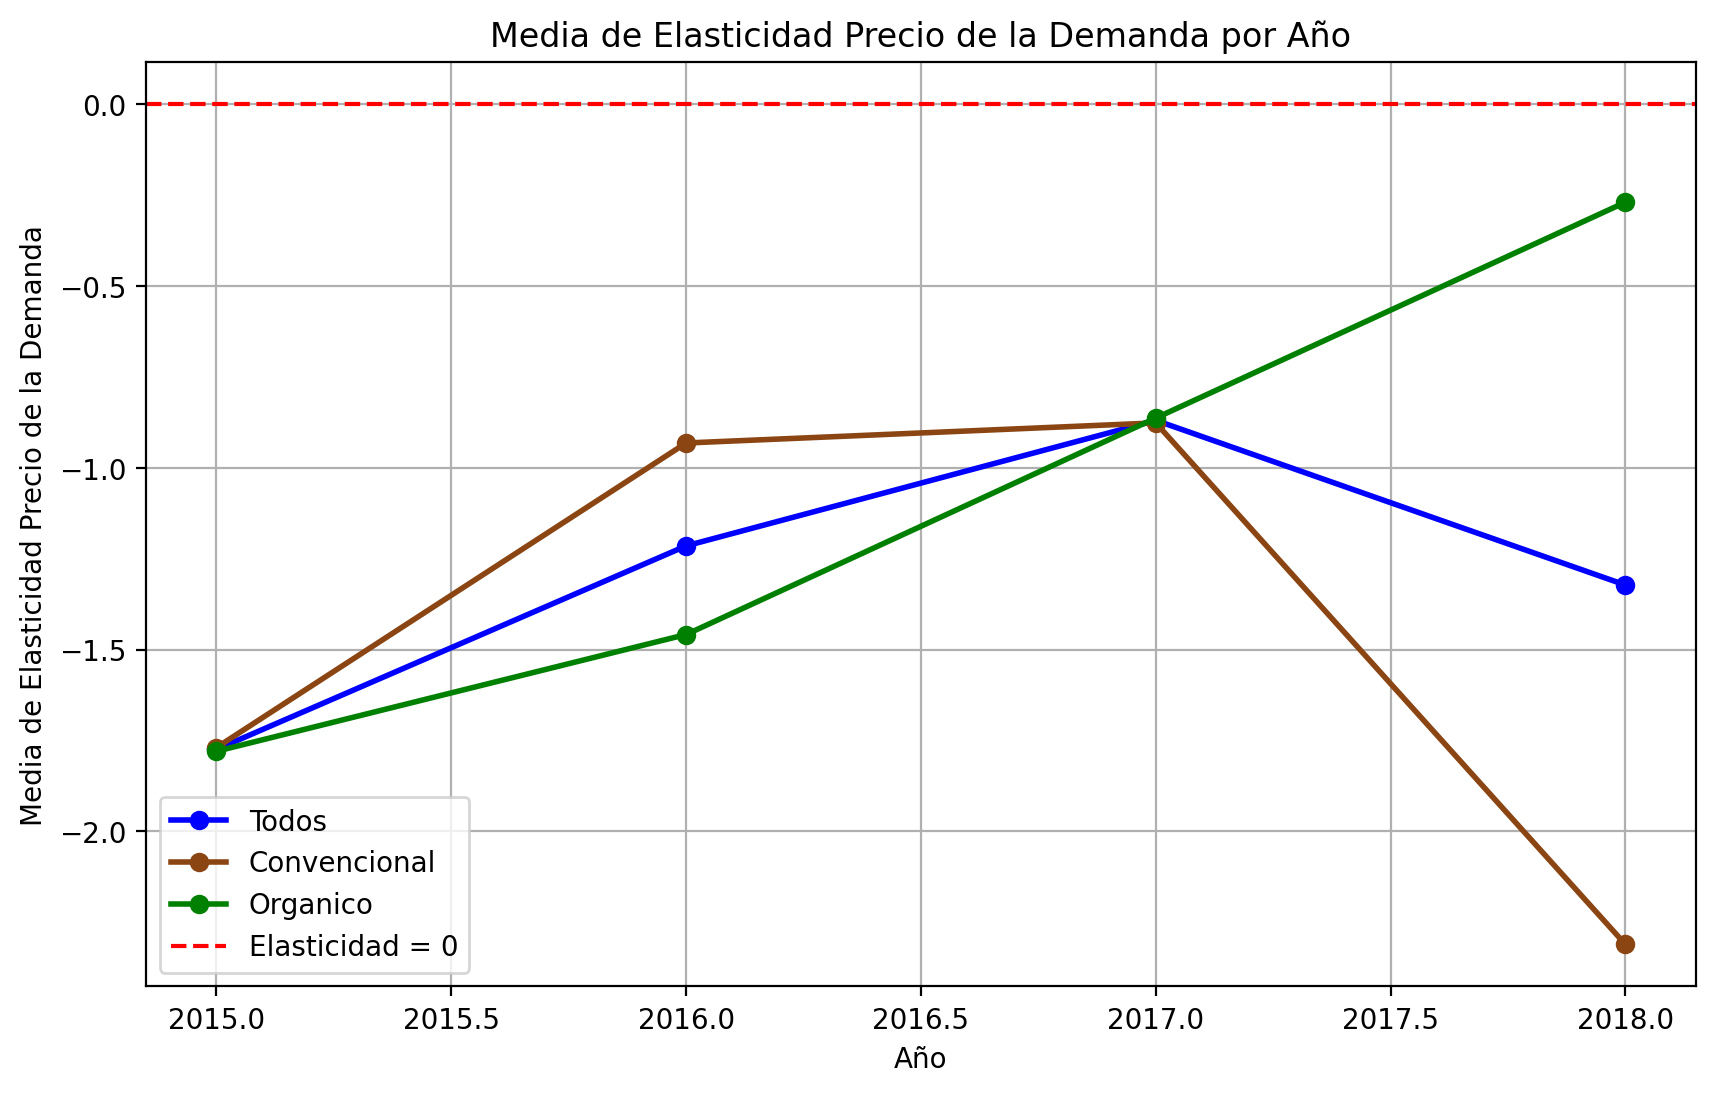

In [13]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de línea para elasticidad media total
plt.plot(elasticidad_media_por_año['year'], elasticidad_media_por_año['Elasticidad'], color='blue', linestyle='-', marker= 'o',linewidth=2, label='Todos')

# Gráfico de línea para elasticidad media de aguacates convencionales
plt.plot(elasticidad_media_por_año_conv['year'], elasticidad_media_por_año_conv['Elasticidad'], color='saddlebrown', linestyle='-',marker= 'o', linewidth=2, label='Convencional')

# Gráfico de línea para elasticidad media de aguacates orgánicos
plt.plot(elasticidad_media_por_año_org['year'], elasticidad_media_por_año_org['Elasticidad'], color='green', linestyle='-',marker= 'o', linewidth=2, label='Organico')

# Configurar el gráfico
plt.title('Media de Elasticidad Precio de la Demanda por Año')
plt.xlabel('Año')
plt.ylabel('Media de Elasticidad Precio de la Demanda')
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')
plt.legend(loc='best')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Vemos que la elasticidad es distinta para los tipos de aguacate sobretodo a partir de 2017 en que para los organicos la elasticidad se acerca a cero y por el contrario los convencionales se aleja hasta alcanzar más allà de -2.
Este cambio en 2017 sugiere una divergencia de comportamiento de consumo entre los dos tipos de aguacates: los consumidores de productos orgánicos parecen cada vez menos sensibles al precio, mientras que los consumidores de convencionales son mucho más sensibles.
Los consumidores de aguacates orgánicos tienden a ser más inelásticos, mostrando lealtad a este segmento sin importar el precio.
Los consumidores de aguacates convencionales son más sensibles al precio, quizás porque no ven la misma necesidad de consumir aguacates.

#### 2. **Comparación de Elasticidad en Diferentes Mercados:**

   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

In [14]:
elast_regions = filtered2.groupby('region')['Elasticidad'].mean().reset_index()

# Renombrar la columna para mayor claridad
elast_regions.columns = ['region', 'Elasticidad Promedio']

elast_regions

,region,Elasticidad Promedio
0,California,-0.000006
1,GreatLakes,-0.000014
2,Midsouth,-0.000015
3,Northeast,-0.000010
4,Plains,-0.000042
5,SouthCentral,-0.000005
6,Southeast,-0.000019
7,West,0.000011


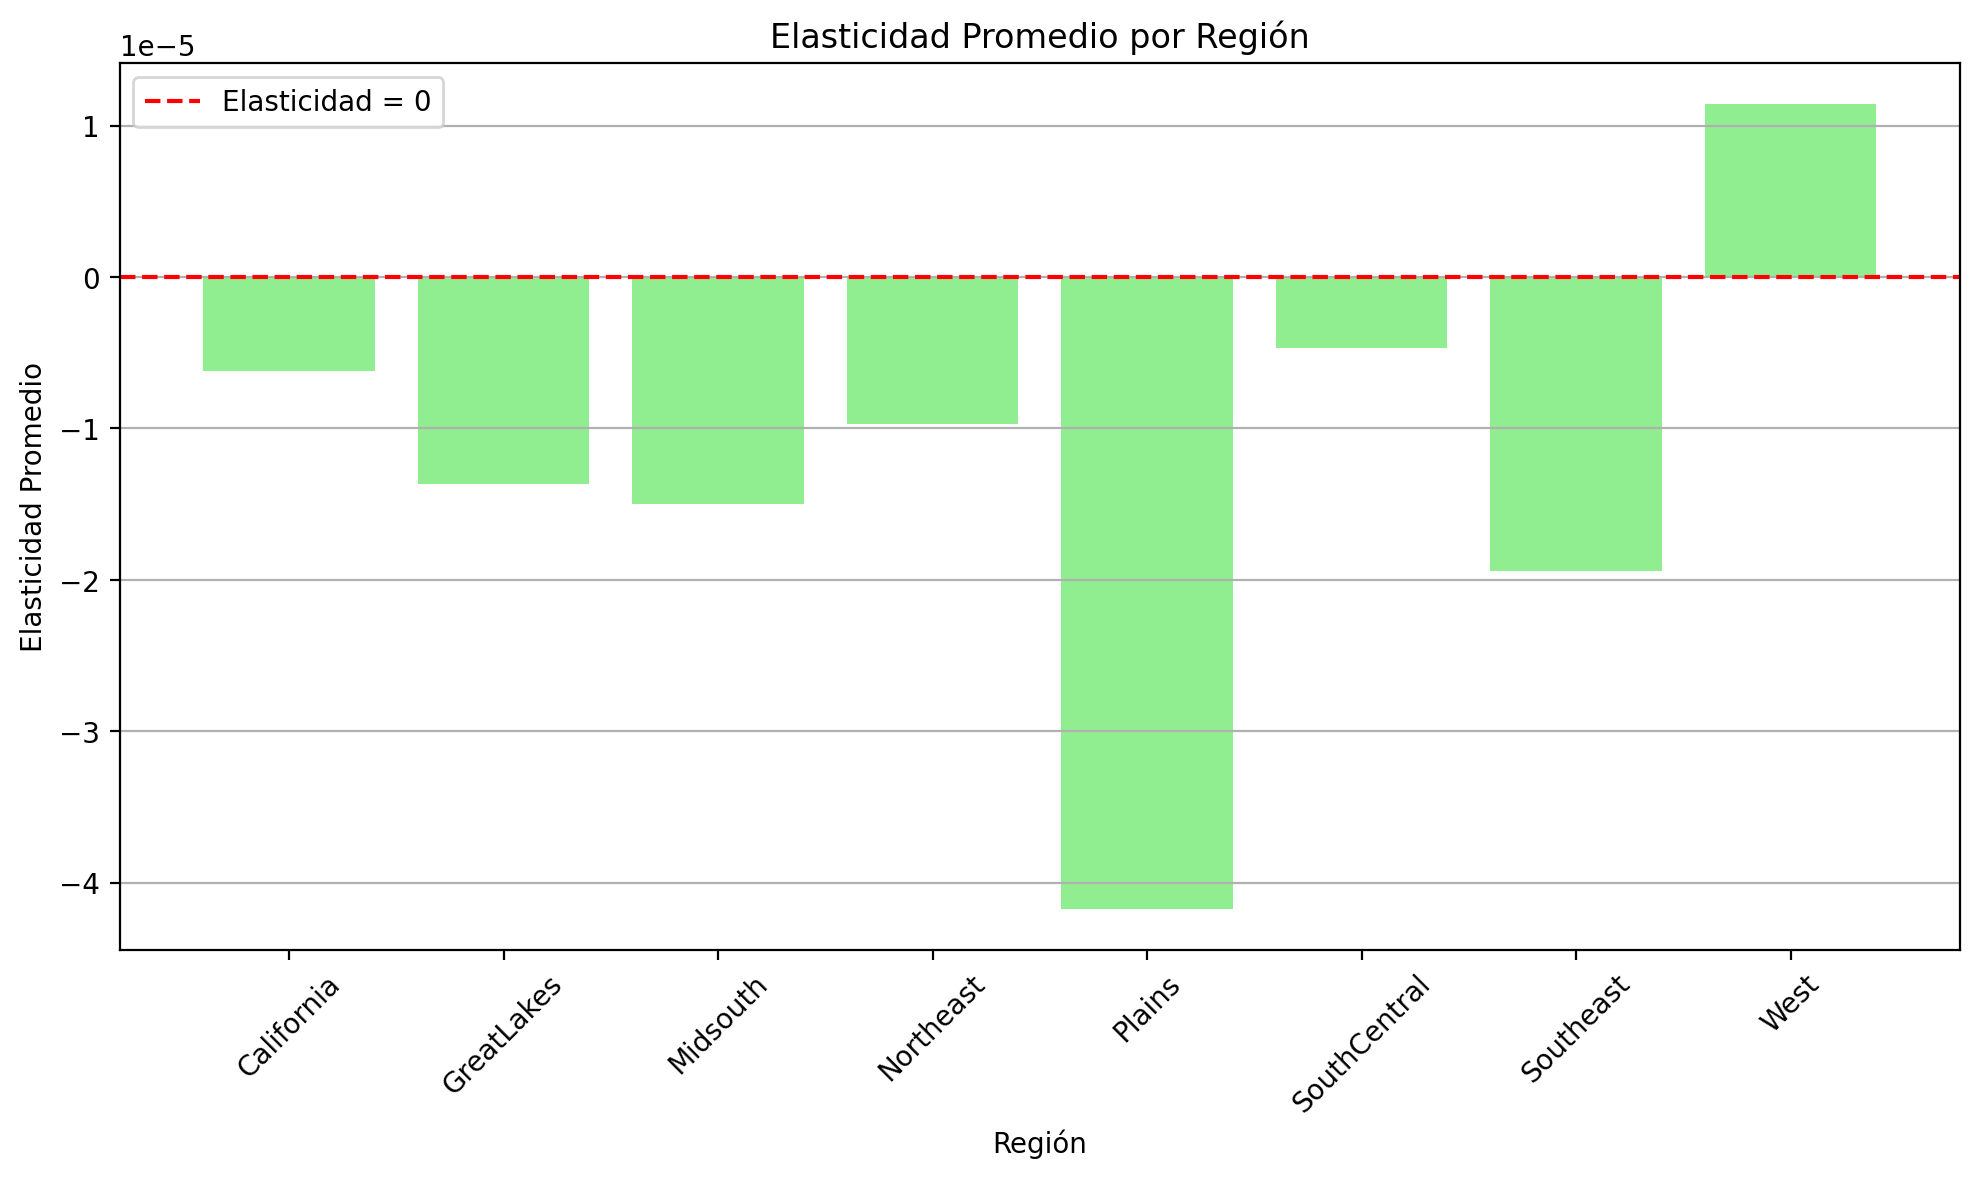

In [15]:
# Crear un gráfico de barras para la elasticidad promedio por región
plt.figure(figsize=(10, 6))
plt.bar(elast_regions['region'], elast_regions['Elasticidad Promedio'], color='lightgreen')
plt.title('Elasticidad Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Elasticidad Promedio')
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')  # Línea en y=0
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout
plt.show()

Podríamos hipotetizar que en Plains, por ejemplo, son muy susceptibles al cambio del precio dado que la elasticidad es -2.7 y en cambio en la zona de SouthCentral la variación del precio no repercute tan significativamente en su consumo (elasticidad cercana a 0, que correponde con demanda inelástica).

#### 3. **Elasticidad a Nivel de Tipo de Bolsa:**

   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

In [16]:
elast_bolsas_s=filtered2.groupby('Small Bags')['Elasticidad'].mean().reset_index()
elast_bolsas_l=filtered2.groupby('Large Bags')['Elasticidad'].mean().reset_index()
elast_bolsas_xl=filtered2.groupby('XLarge Bags')['Elasticidad'].mean().reset_index()

# Renombrar la columna para mayor claridad
elast_bolsas_s.columns = ['Small Bags', 'Elasticidad Promedio']
elast_bolsas_l.columns = ['Large Bags', 'Elasticidad Promedio']
elast_bolsas_xl.columns = ['XLarge Bags', 'Elasticidad Promedio']
 
elast_bolsas_s

,Small Bags,Elasticidad Promedio
0,1313.87,-3.921757e-05
1,1992.35,-4.740407e-04
2,2226.01,-9.117256e-05
3,2251.17,1.191904e-04
4,2726.04,-3.435186e-06
...,...,...
1250,2198776.68,-6.571787e-07
1251,2230913.33,-8.123161e-08
1252,2241712.64,-1.469173e-07
1253,2311921.49,5.853027e-09


Tenemos que los tipos de bolsa son columnas y por lo tanto hay que reestructurar el dataframe para que podamos tener los tipos de bola en filas. Eso nos permitirá graficar lo que estamos buscando, la elasticidad segun tipo de bolsa.

  Tipo de Bolsa  Elasticidad Promedio
0    Large Bags             -0.000012
1    Small Bags             -0.000012
2   XLarge Bags              0.000004


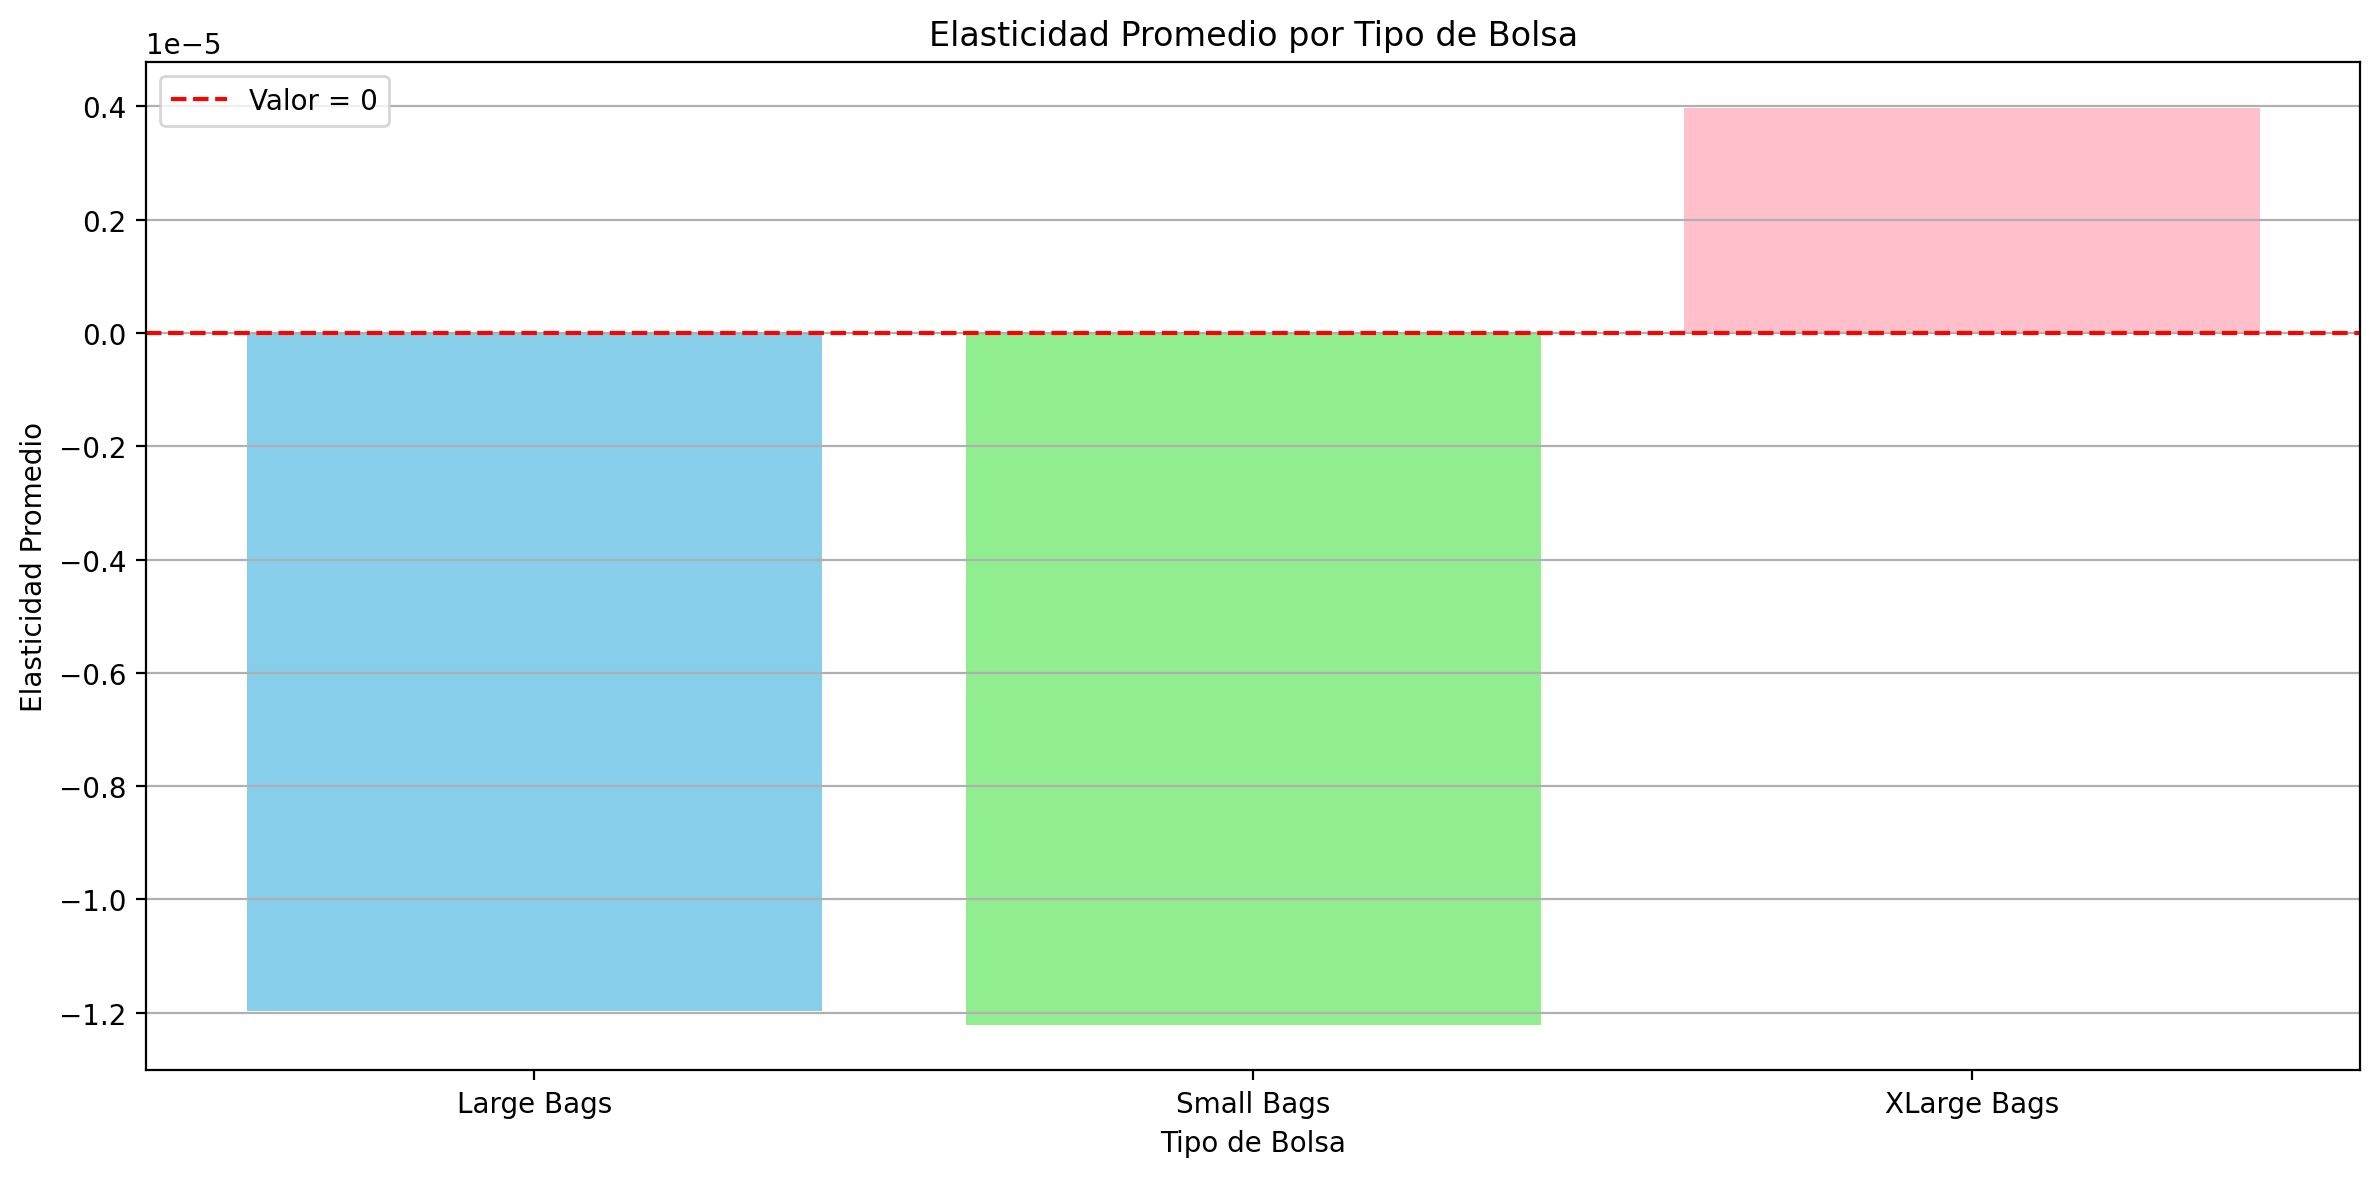

In [17]:
# Vamos a crear un nuevo DataFrame largo
# Seleccionamos solo las columnas necesarias y hacemos un melt
filtered2_long = pd.melt(filtered2, id_vars=['Elasticidad'], 
                          value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],
                          var_name='Tipo de Bolsa', value_name='Cantidad')

# Filtramos las filas donde la cantidad es 0
filtered2_long = filtered2_long[filtered2_long['Cantidad'] > 0]

# Ahora podemos calcular la elasticidad promedio por tipo de bolsa
elasticidad_promedio = filtered2_long.groupby('Tipo de Bolsa')['Elasticidad'].mean().reset_index()

# Renombrar la columna para mayor claridad
elasticidad_promedio.columns = ['Tipo de Bolsa', 'Elasticidad Promedio']

# Imprimir el resultado
print(elasticidad_promedio)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(elasticidad_promedio['Tipo de Bolsa'], elasticidad_promedio['Elasticidad Promedio'], color=['skyblue', 'lightgreen', 'pink'])
plt.title('Elasticidad Promedio por Tipo de Bolsa')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Elasticidad Promedio')
plt.axhline(0, color='red', linestyle='--', label='Valor = 0')  # Línea de referencia en y=0
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**

   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

In [18]:
elast_type = filtered2.groupby('type')['Elasticidad'].mean().reset_index()

# Renombrar la columna para mayor claridad
elast_type.columns = ['type', 'Elasticidad Promedio']

elast_type

,type,Elasticidad Promedio
0,conventional,-4.293770e-07
1,organic,-2.291961e-05


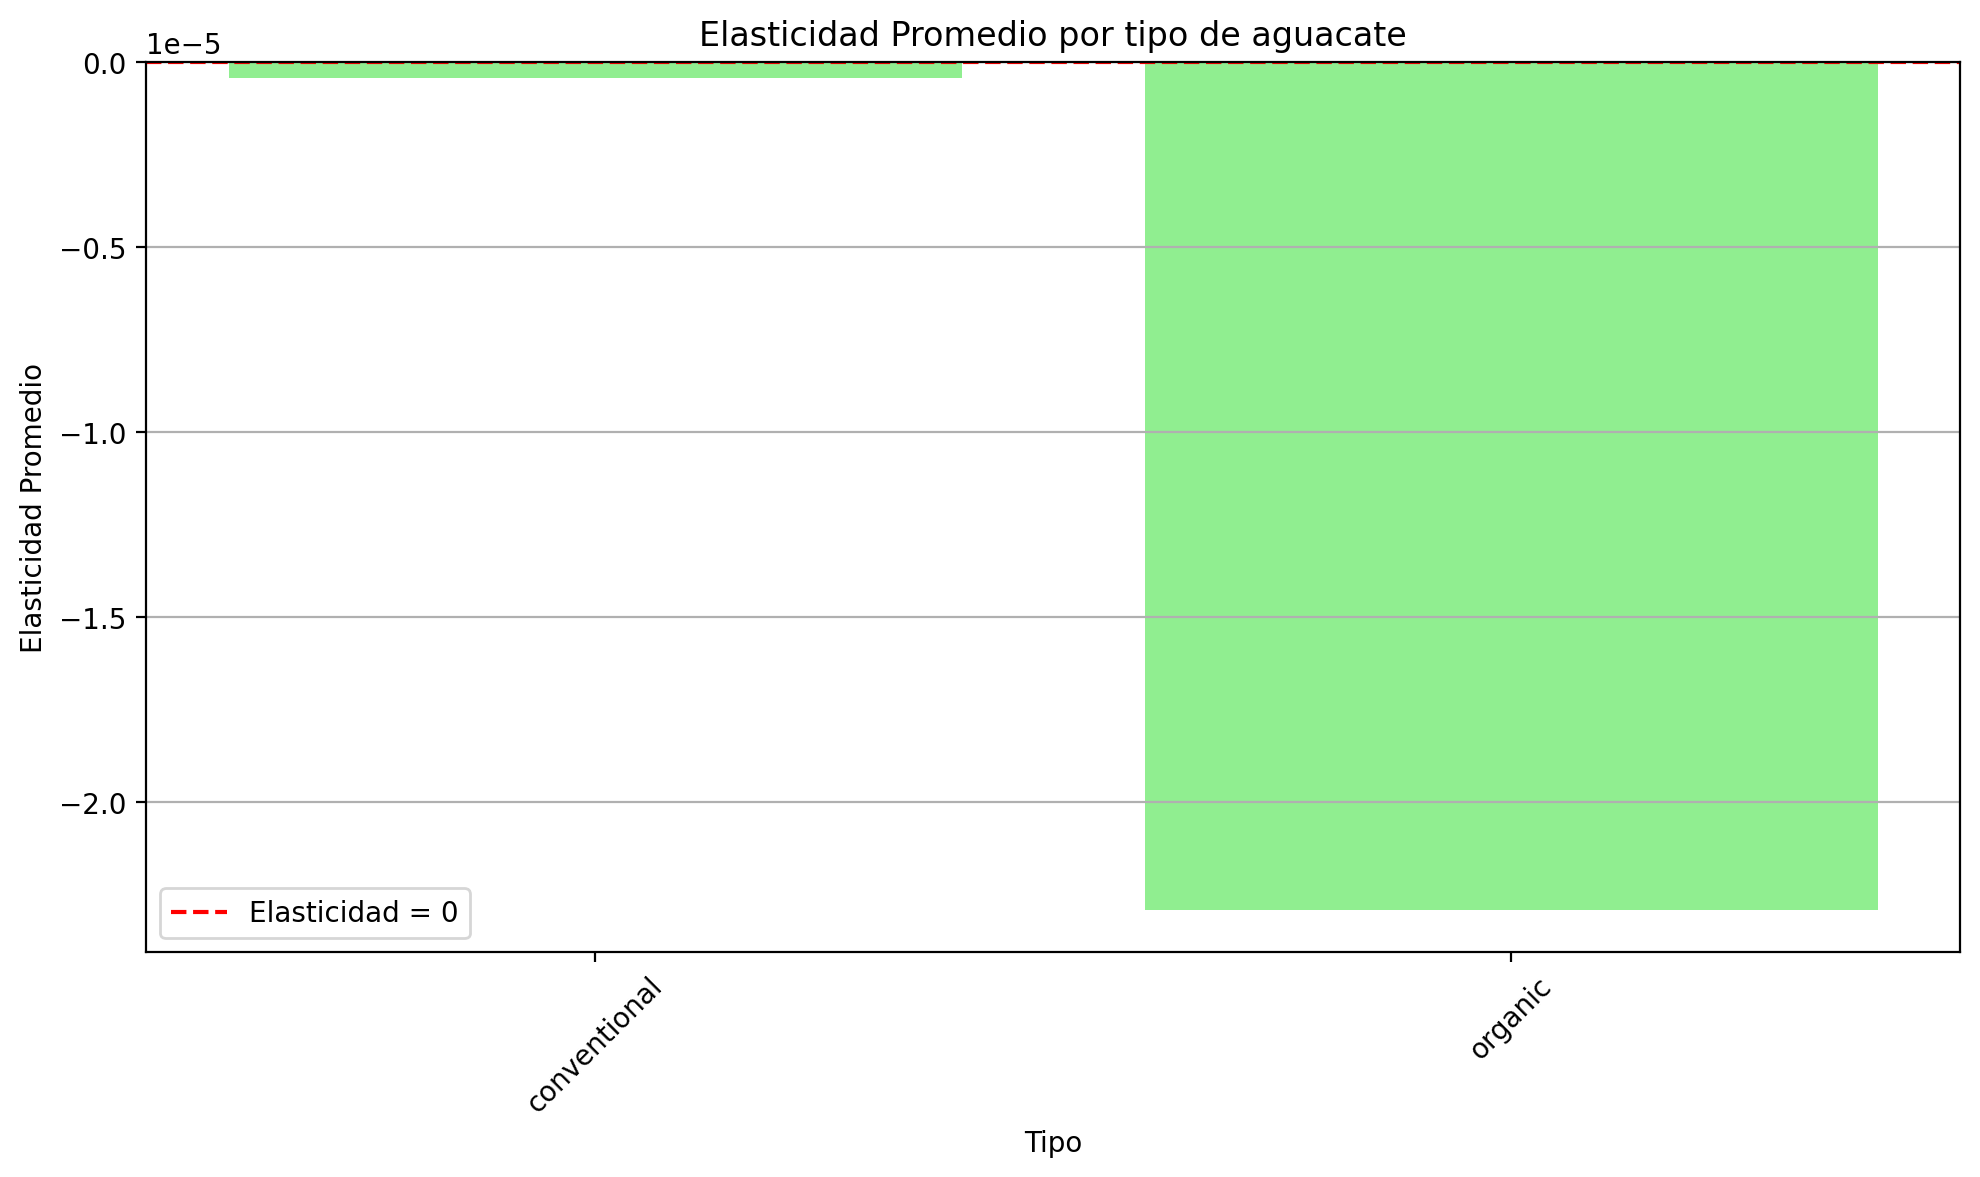

In [19]:
# Crear un gráfico de barras para la elasticidad promedio por región
plt.figure(figsize=(10, 6))
plt.bar(elast_type['type'], elast_type['Elasticidad Promedio'], color='lightgreen')
plt.title('Elasticidad Promedio por tipo de aguacate')
plt.xlabel('Tipo')
plt.ylabel('Elasticidad Promedio')
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')  # Línea en y=0
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout
plt.show()

#### 5. **Análisis de la Elasticidad Precios-Ventas:**

   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

In [20]:
filtered2.info()
elast_PV=filtered2[['AveragePrice','Total Volume', 'Elasticidad']]
elast_PV.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 313 to 18234
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1255 non-null   int64         
 1   Date                    1255 non-null   datetime64[ns]
 2   AveragePrice            1255 non-null   float64       
 3   Total Volume            1255 non-null   float64       
 4   4046                    1255 non-null   float64       
 5   4225                    1255 non-null   float64       
 6   4770                    1255 non-null   float64       
 7   Total Bags              1255 non-null   float64       
 8   Small Bags              1255 non-null   float64       
 9   Large Bags              1255 non-null   float64       
 10  XLarge Bags             1255 non-null   float64       
 11  type                    1255 non-null   object        
 12  year                    1255 non-null   int64     

,AveragePrice,Total Volume,Elasticidad
313,0.94,4695737.21,NaN
316,0.91,4575710.62,-2.495176e-07
317,0.92,4804278.16,9.040246e-07
319,0.98,5148983.51,-1.116112e-07
321,1.12,4592461.81,-2.258331e-07


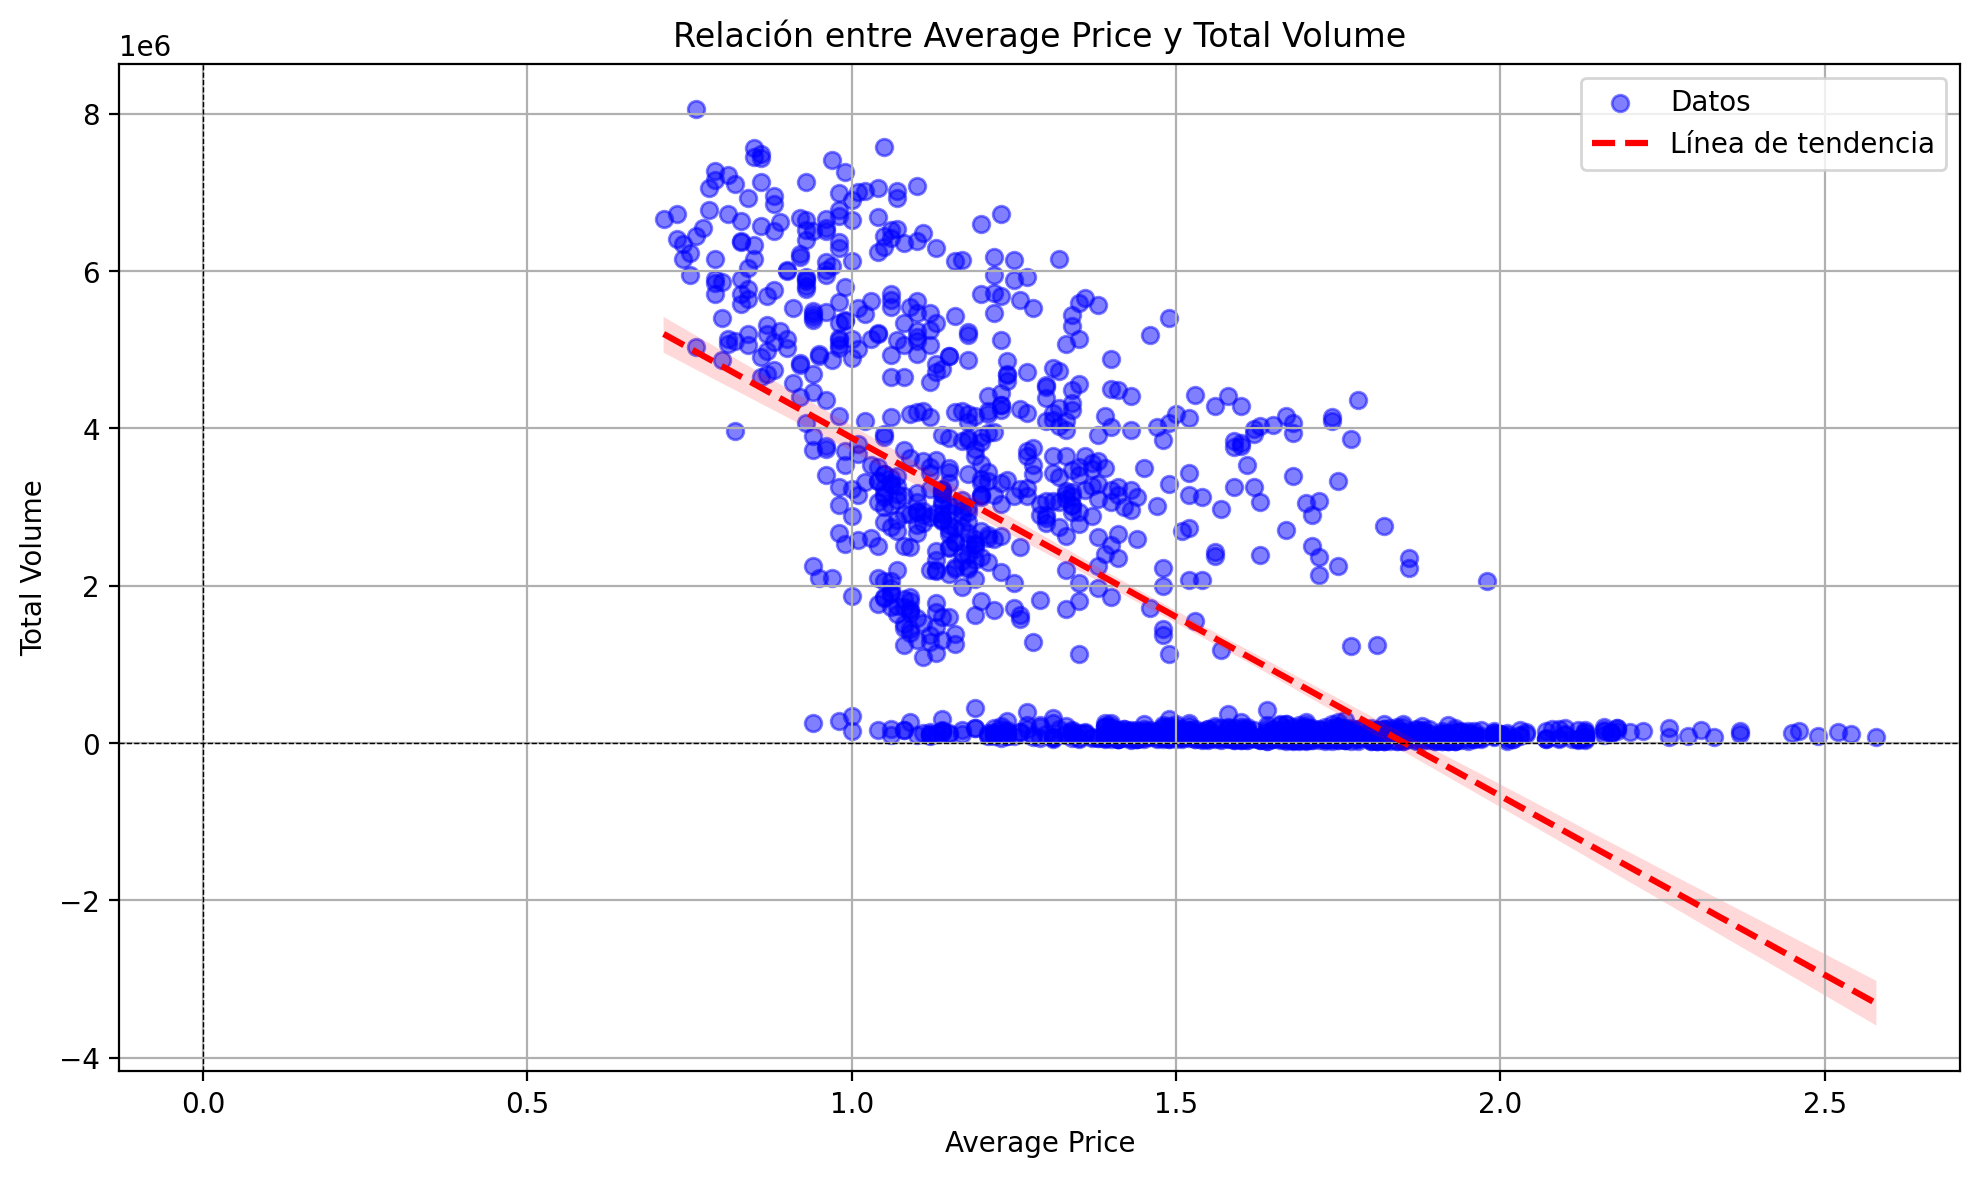

In [21]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(elast_PV['AveragePrice'], elast_PV['Total Volume'], alpha=0.5, color='blue', label='Datos')

# Ajustar la línea de tendencia. el regplot ajusta automaticamente una linea de regresión a los datos.usa metodo estadístico para calcularla.
sns.regplot(x='AveragePrice', y='Total Volume', data=elast_PV, scatter=False, color='red', line_kws={"linestyle":"--"}, label='Línea de tendencia')

# Configuración del gráfico
plt.title('Relación entre Average Price y Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.axhline(0, color='black',linewidth=0.5, ls='--')  # Línea horizontal en y=0
plt.axvline(0, color='black',linewidth=0.5, ls='--')  # Línea vertical en x=0
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

     AveragePrice  Total Volume   Elasticidad
313          0.94    4695737.21           NaN
316          0.91    4575710.62 -2.495176e-07
317          0.92    4804278.16  9.040246e-07
319          0.98    5148983.51 -1.116112e-07
321          1.12    4592461.81 -2.258331e-07


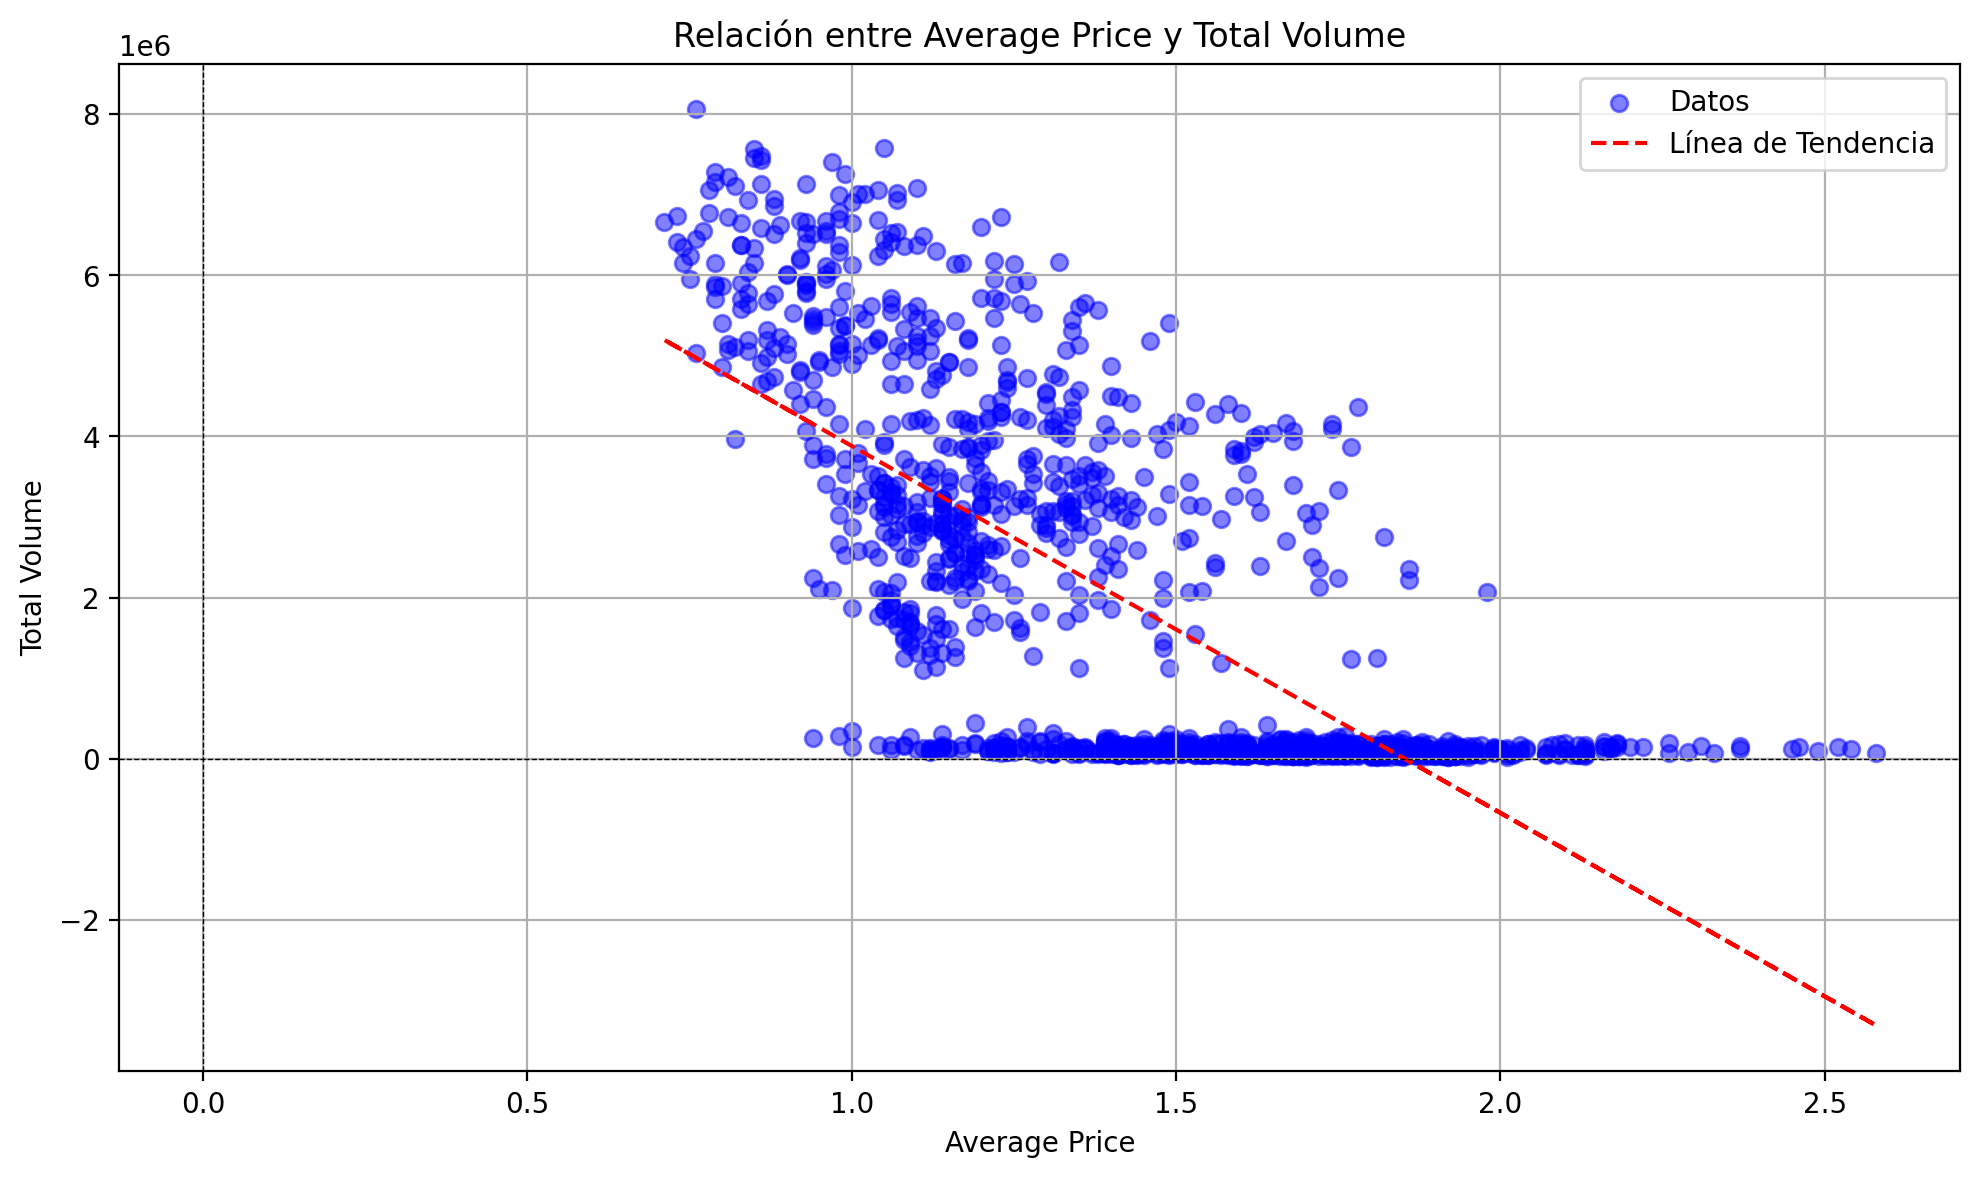

In [22]:
# Seleccionamos las columnas relevantes
elast_PV = filtered2[['AveragePrice', 'Total Volume', 'Elasticidad']]

# Comprobamos los primeros registros
print(elast_PV.head())

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(elast_PV['AveragePrice'], elast_PV['Total Volume'], alpha=0.5, color='blue', label='Datos')

# Calcular la línea de tendencia (ajuste lineal) mediante la ecuación de la recta
m, b = np.polyfit(elast_PV['AveragePrice'], elast_PV['Total Volume'], 1)  # 1 para lineal
plt.plot(elast_PV['AveragePrice'], m * elast_PV['AveragePrice'] + b, color='red', linestyle='--', label='Línea de Tendencia')

# Configuración del gráfico
plt.title('Relación entre Average Price y Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # Línea vertical en x=0
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

En ambos casos el gráfico sale similar.
La interpretación sobre la pendiente de la recta (q es negativa) es q los consumidores son susceptibles al precio como ya sabíamos.
El hecho que la linea no se ajuste con la distribución de los puntos nos da la pista que puede no estar reflejando adecuadamente la relación. Eso podría deberse a los puntos en la nube que son muy distintos de los puntos alrededor de y=0.
Quizás podríamos dividir ese estudio entre aguacates convencionales y orgánicos para tratar de dividir esos dos tipos de tendencias.

In [23]:
# Seleccionamos las columnas relevantes
filtered_conventional = filtered2[filtered2['type'] == 'conventional']
elast_PV_conv = filtered_conventional[['AveragePrice', 'Total Volume', 'Elasticidad']]
elast_PV_conv.info()

filtered_organic=filtered2[filtered2['type'] == 'organic']
elast_PV_org= filtered_organic[['AveragePrice', 'Total Volume', 'Elasticidad']]
elast_PV_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 313 to 9113
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  598 non-null    float64
 1   Total Volume  598 non-null    float64
 2   Elasticidad   597 non-null    float64
dtypes: float64(3)
memory usage: 18.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 9438 to 18234
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  657 non-null    float64
 1   Total Volume  657 non-null    float64
 2   Elasticidad   657 non-null    float64
dtypes: float64(3)
memory usage: 20.5 KB


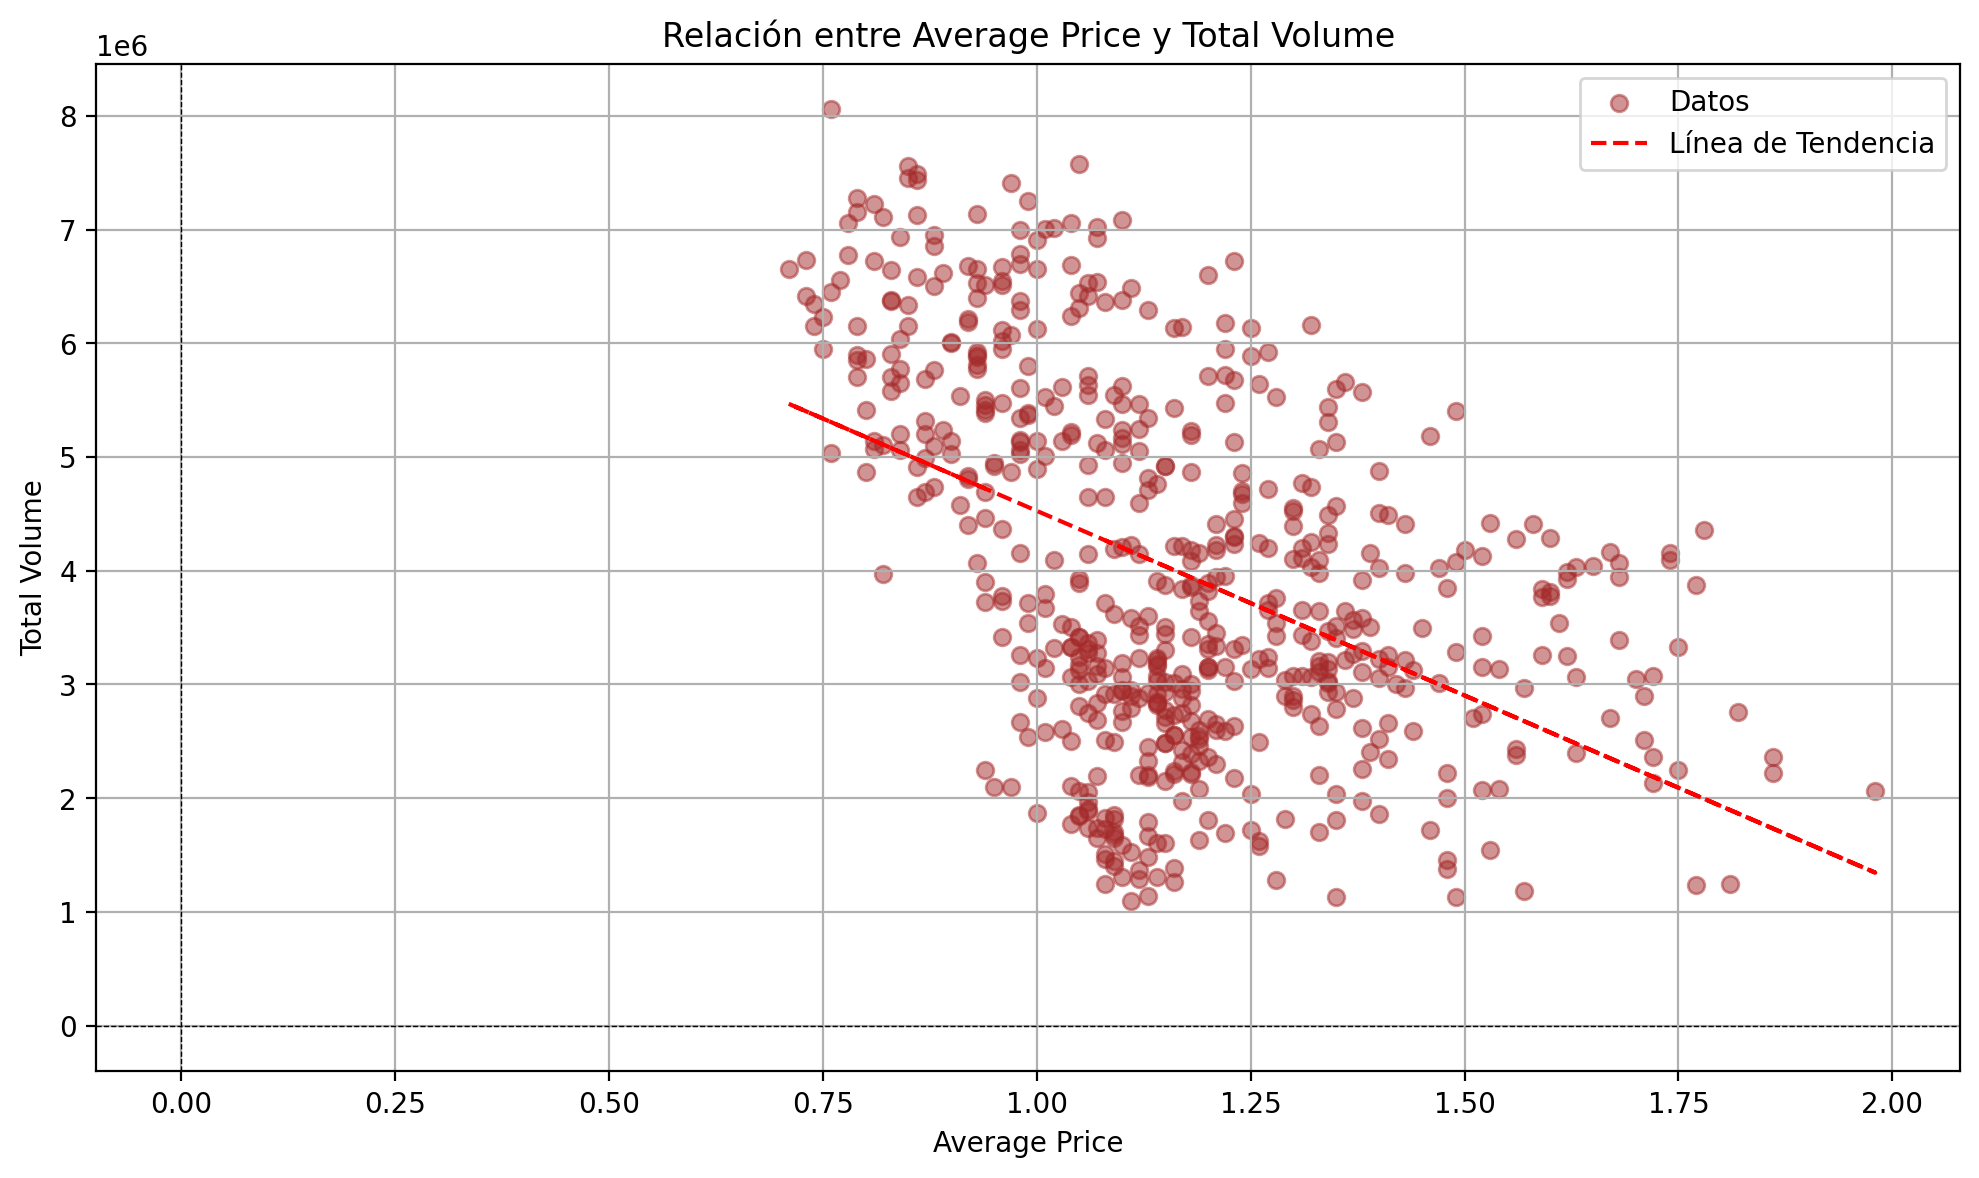

In [24]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(elast_PV_conv['AveragePrice'], elast_PV_conv['Total Volume'], alpha=0.5, color='brown', label='Datos')

# Calcular la línea de tendencia (ajuste lineal) mediante la ecuación de la recta
m, b = np.polyfit(elast_PV_conv['AveragePrice'], elast_PV_conv['Total Volume'], 1)  # 1 para lineal
plt.plot(elast_PV_conv['AveragePrice'], m * elast_PV_conv['AveragePrice'] + b, color='red', linestyle='--', label='Línea de Tendencia')

# Configuración del gráfico
plt.title('Relación entre Average Price y Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # Línea vertical en x=0
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

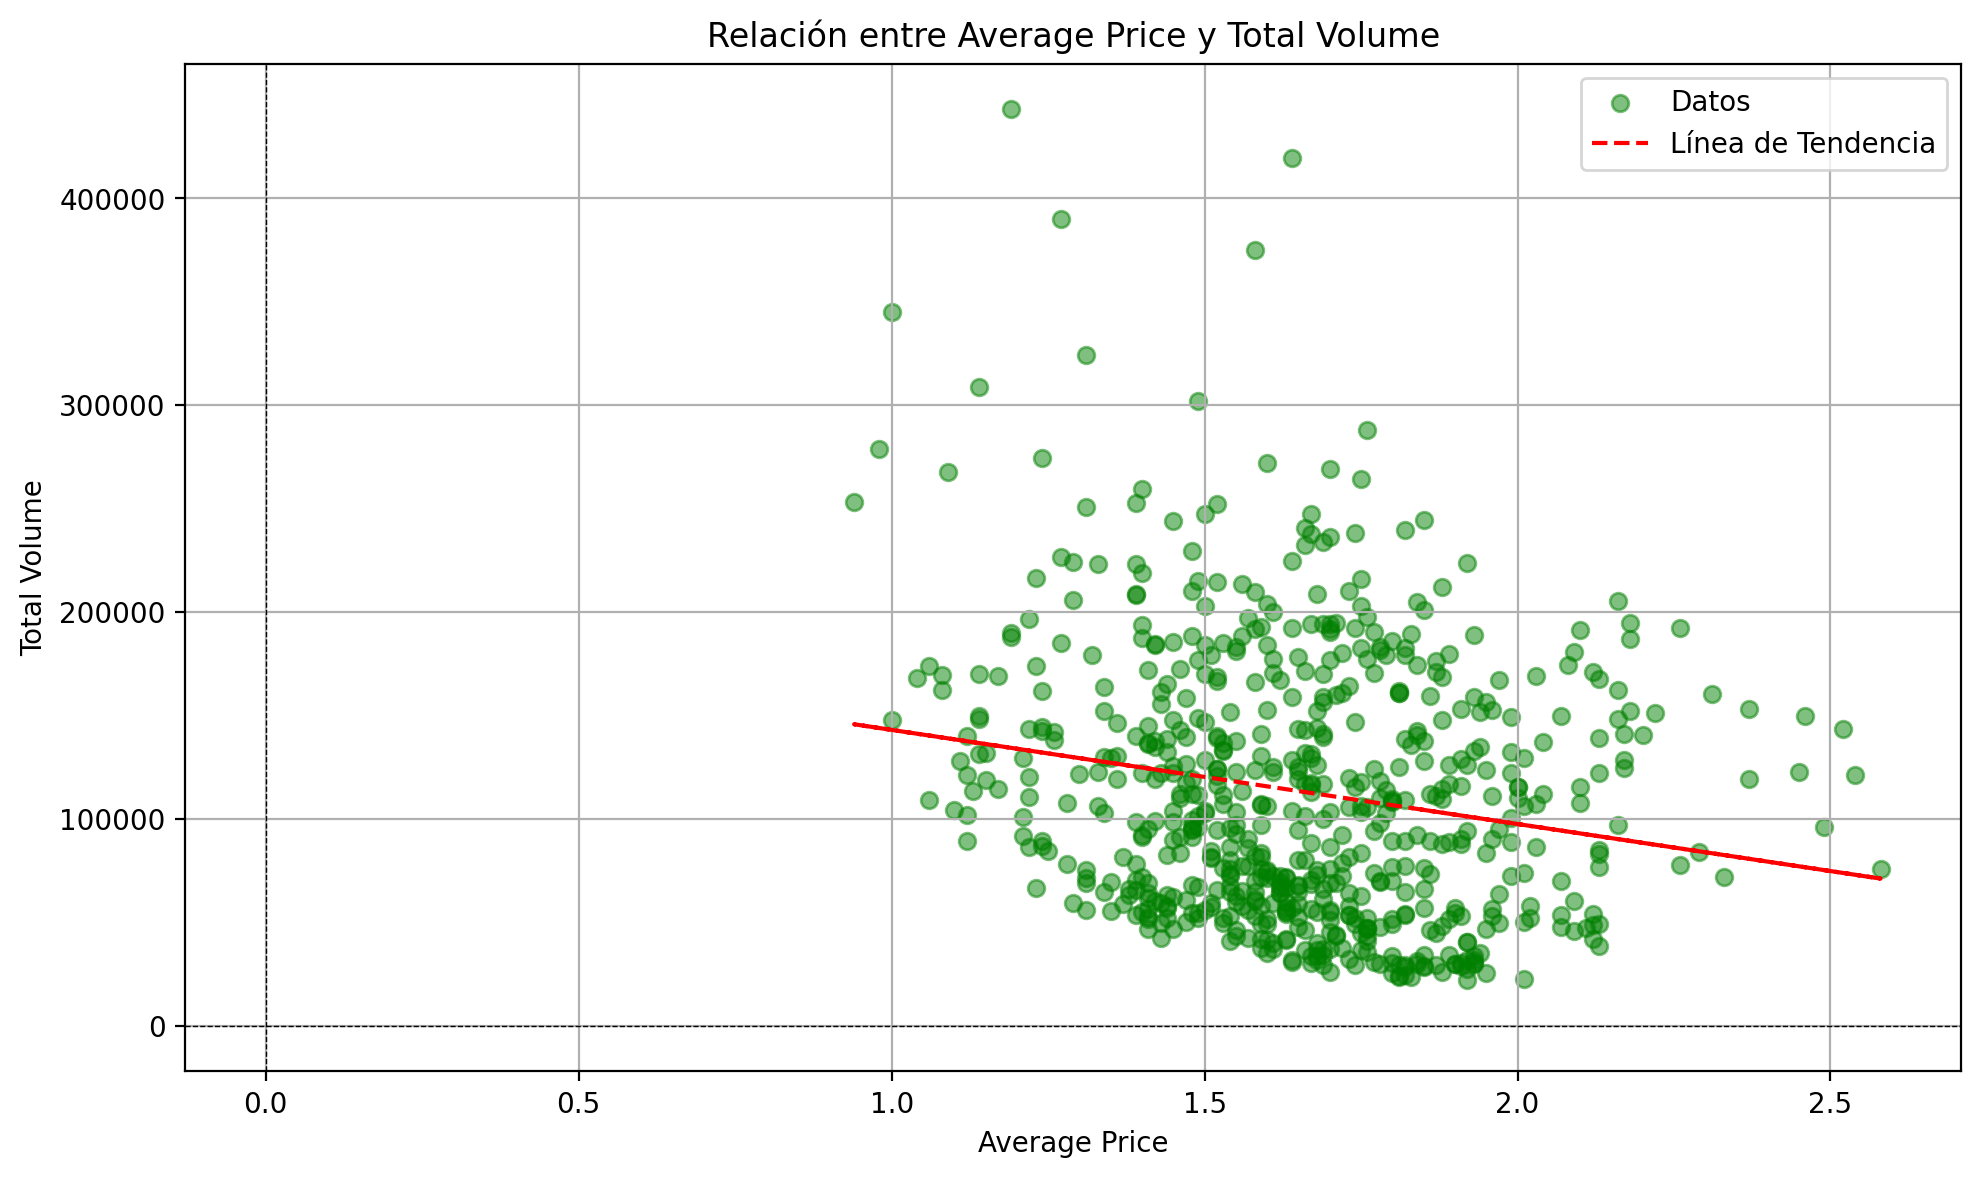

In [25]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(elast_PV_org['AveragePrice'], elast_PV_org['Total Volume'], alpha=0.5, color='green', label='Datos')

# Calcular la línea de tendencia (ajuste lineal) mediante la ecuación de la recta
m, b = np.polyfit(elast_PV_org['AveragePrice'], elast_PV_org['Total Volume'], 1)  # 1 para lineal
plt.plot(elast_PV_org['AveragePrice'], m * elast_PV_org['AveragePrice'] + b, color='red', linestyle='--', label='Línea de Tendencia')

# Configuración del gráfico
plt.title('Relación entre Average Price y Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # Línea vertical en x=0
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Ahora las lineas parecen representar mejor las nubes de puntos. En ambos casos la pendiente es negativa pero con una pendiente menor para el caso de los aguacates orgánicos. Esto representaria que la susceptibilidad al precio de los consumidores de aguacates orgánicos es menor (cambios en el precio no influyen tanto en el volumen de ventas como en el convencional).